# Video Explanation
#### Link: https://drive.google.com/file/d/1BiXidqv-gmwdHvXQ1_wgfXPVFAO7_nRz/view?usp=sharing

# Task 1: Cleaning the Data

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data
data = pd.read_csv("ev.csv") 
data.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     int64  
 4   Engine power [KM]                       53 non-null     int64  
 5   Maximum torque [Nm]                     53 non-null     int64  
 6   Type of brakes                          52 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     int64  
 10  Wheelbase [cm]                          53 non-null     float64


In [4]:
data.isnull().sum() #for checking the missing values. 

Car full name                             0
Make                                      0
Model                                     0
Minimal price (gross) [PLN]               0
Engine power [KM]                         0
Maximum torque [Nm]                       0
Type of brakes                            1
Drive type                                0
Battery capacity [kWh]                    0
Range (WLTP) [km]                         0
Wheelbase [cm]                            0
Length [cm]                               0
Width [cm]                                0
Height [cm]                               0
Minimal empty weight [kg]                 0
Permissable gross weight [kg]             8
Maximum load capacity [kg]                8
Number of seats                           0
Number of doors                           0
Tire size [in]                            0
Maximum speed [kph]                       0
Boot capacity (VDA) [l]                   1
Acceleration 0-100 kph [s]      

In [5]:
data['Type of brakes'].value_counts() #to find mode. To replace missing value. 

Type of brakes
disc (front + rear)           45
disc (front) + drum (rear)     7
Name: count, dtype: int64

In [6]:
data['Type of brakes'].fillna(data['Type of brakes'].mode()[0],inplace=True) #replacing missing value with modal 'disc (front + rear)'
data['Type of brakes'].value_counts()

Type of brakes
disc (front + rear)           46
disc (front) + drum (rear)     7
Name: count, dtype: int64

<Axes: >

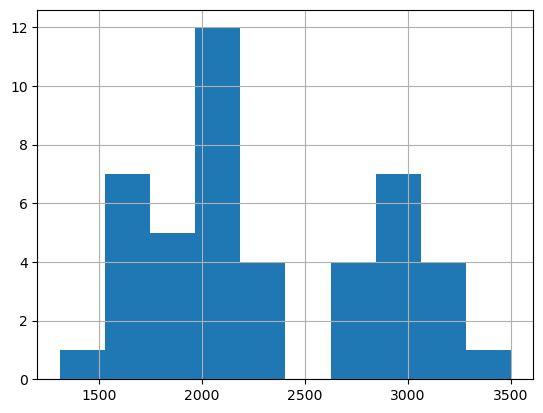

In [7]:
# to check distribution of values in continuous type of variables - we plot histograms.
data['Permissable gross weight [kg]'].hist(bins = 10)

<Axes: >

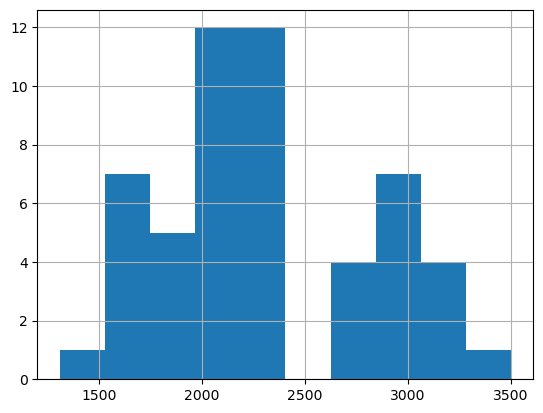

In [8]:
# from the distribution of 'Permissable gross weight [kg]' we can replace the missing values by the mean values 
data['Permissable gross weight [kg]'].fillna(data['Permissable gross weight [kg]'].mean(),inplace=True)
data['Permissable gross weight [kg]'].hist(bins = 10)

In [9]:
#to check remaining missing value columns
data.isnull().sum()

Car full name                             0
Make                                      0
Model                                     0
Minimal price (gross) [PLN]               0
Engine power [KM]                         0
Maximum torque [Nm]                       0
Type of brakes                            0
Drive type                                0
Battery capacity [kWh]                    0
Range (WLTP) [km]                         0
Wheelbase [cm]                            0
Length [cm]                               0
Width [cm]                                0
Height [cm]                               0
Minimal empty weight [kg]                 0
Permissable gross weight [kg]             0
Maximum load capacity [kg]                8
Number of seats                           0
Number of doors                           0
Tire size [in]                            0
Maximum speed [kph]                       0
Boot capacity (VDA) [l]                   1
Acceleration 0-100 kph [s]      

<Axes: >

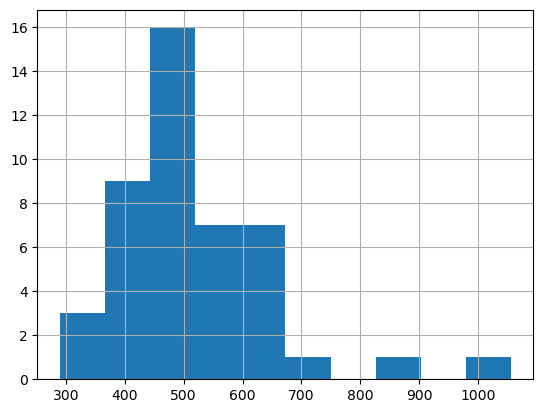

In [10]:
data['Maximum load capacity [kg]'].hist(bins = 10)

<Axes: >

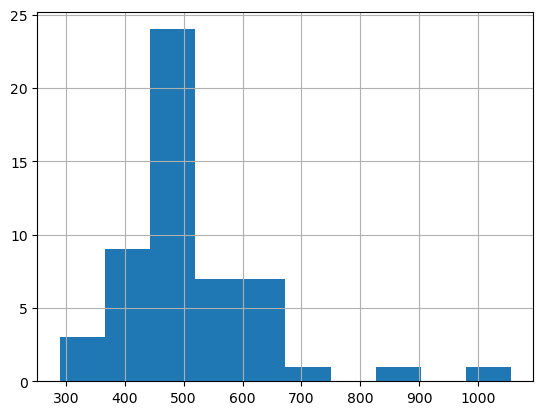

In [11]:
data['Maximum load capacity [kg]'].fillna(data['Maximum load capacity [kg]'].median(),inplace=True)
data['Maximum load capacity [kg]'].hist(bins = 10)

In [12]:
data.isnull().sum()

Car full name                             0
Make                                      0
Model                                     0
Minimal price (gross) [PLN]               0
Engine power [KM]                         0
Maximum torque [Nm]                       0
Type of brakes                            0
Drive type                                0
Battery capacity [kWh]                    0
Range (WLTP) [km]                         0
Wheelbase [cm]                            0
Length [cm]                               0
Width [cm]                                0
Height [cm]                               0
Minimal empty weight [kg]                 0
Permissable gross weight [kg]             0
Maximum load capacity [kg]                0
Number of seats                           0
Number of doors                           0
Tire size [in]                            0
Maximum speed [kph]                       0
Boot capacity (VDA) [l]                   1
Acceleration 0-100 kph [s]      

<Axes: >

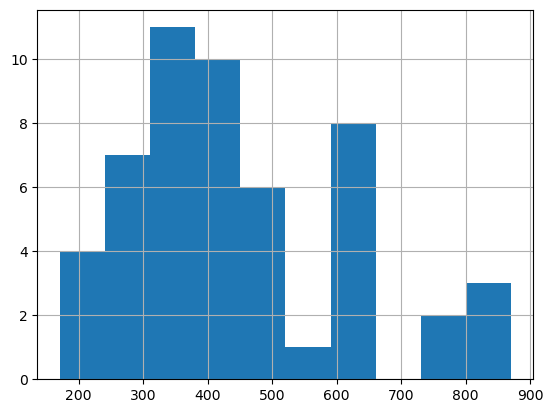

In [13]:
data['Boot capacity (VDA) [l]'].hist(bins = 10)

<Axes: >

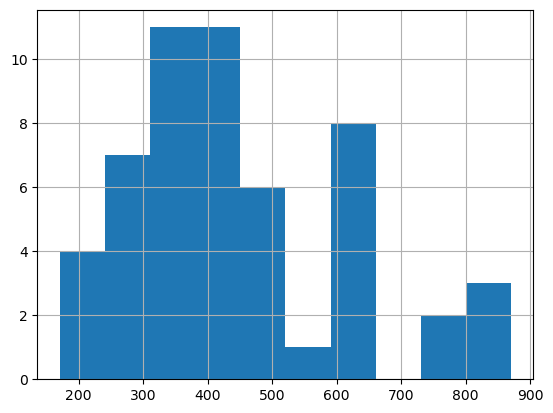

In [14]:
data['Boot capacity (VDA) [l]'].fillna(data['Boot capacity (VDA) [l]'].mean(),inplace = True)
data['Boot capacity (VDA) [l]'].hist(bins = 10)

In [15]:
data.isnull().sum()

Car full name                             0
Make                                      0
Model                                     0
Minimal price (gross) [PLN]               0
Engine power [KM]                         0
Maximum torque [Nm]                       0
Type of brakes                            0
Drive type                                0
Battery capacity [kWh]                    0
Range (WLTP) [km]                         0
Wheelbase [cm]                            0
Length [cm]                               0
Width [cm]                                0
Height [cm]                               0
Minimal empty weight [kg]                 0
Permissable gross weight [kg]             0
Maximum load capacity [kg]                0
Number of seats                           0
Number of doors                           0
Tire size [in]                            0
Maximum speed [kph]                       0
Boot capacity (VDA) [l]                   0
Acceleration 0-100 kph [s]      

<Axes: >

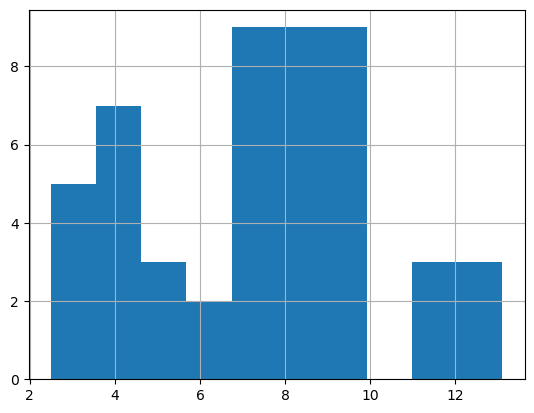

In [16]:
data['Acceleration 0-100 kph [s]'].hist(bins = 10)

<Axes: >

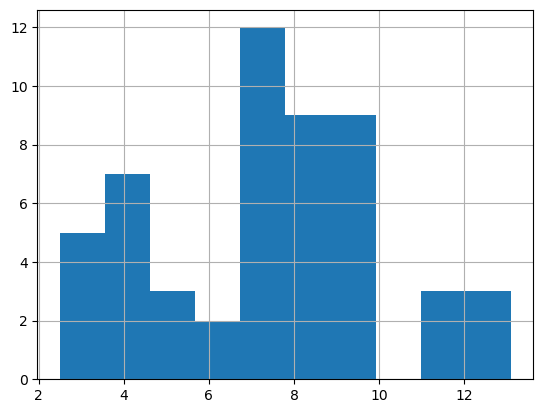

In [17]:
data['Acceleration 0-100 kph [s]'].fillna(data['Acceleration 0-100 kph [s]'].mean(),inplace = True)
data['Acceleration 0-100 kph [s]'].hist(bins = 10)

In [18]:
data.isnull().sum()

Car full name                             0
Make                                      0
Model                                     0
Minimal price (gross) [PLN]               0
Engine power [KM]                         0
Maximum torque [Nm]                       0
Type of brakes                            0
Drive type                                0
Battery capacity [kWh]                    0
Range (WLTP) [km]                         0
Wheelbase [cm]                            0
Length [cm]                               0
Width [cm]                                0
Height [cm]                               0
Minimal empty weight [kg]                 0
Permissable gross weight [kg]             0
Maximum load capacity [kg]                0
Number of seats                           0
Number of doors                           0
Tire size [in]                            0
Maximum speed [kph]                       0
Boot capacity (VDA) [l]                   0
Acceleration 0-100 kph [s]      

<Axes: >

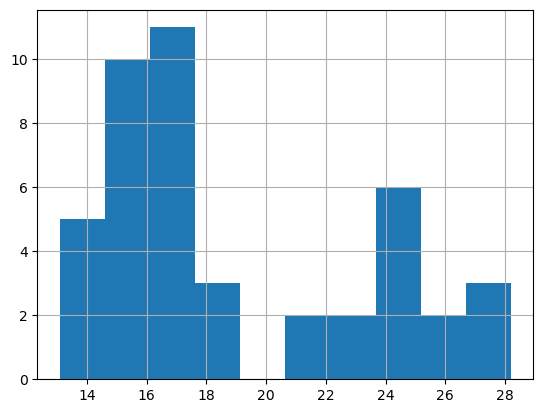

In [19]:
data['mean - Energy consumption [kWh/100 km]'].hist(bins = 10)

<Axes: >

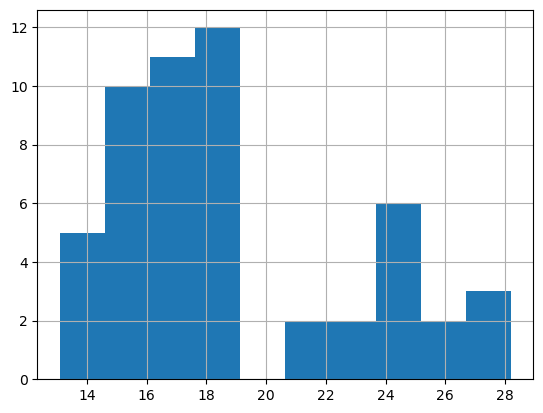

In [20]:
data['mean - Energy consumption [kWh/100 km]'].fillna(data['mean - Energy consumption [kWh/100 km]'].mean(),inplace = True)
data['mean - Energy consumption [kWh/100 km]'].hist(bins = 10)

In [21]:
data.isnull().sum()

Car full name                             0
Make                                      0
Model                                     0
Minimal price (gross) [PLN]               0
Engine power [KM]                         0
Maximum torque [Nm]                       0
Type of brakes                            0
Drive type                                0
Battery capacity [kWh]                    0
Range (WLTP) [km]                         0
Wheelbase [cm]                            0
Length [cm]                               0
Width [cm]                                0
Height [cm]                               0
Minimal empty weight [kg]                 0
Permissable gross weight [kg]             0
Maximum load capacity [kg]                0
Number of seats                           0
Number of doors                           0
Tire size [in]                            0
Maximum speed [kph]                       0
Boot capacity (VDA) [l]                   0
Acceleration 0-100 kph [s]      

### Now we have checked for the errors, missing values & outliers. Replaced the missing ones. Our data is clean for further processing.

# Task 2: EV Growth

In [22]:
data.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [23]:
data['Make'].value_counts()

Make
Tesla            7
Audi             6
Kia              4
Porsche          4
Volkswagen       4
Hyundai          3
BMW              3
Nissan           3
Honda            2
Mercedes-Benz    2
Opel             2
Peugeot          2
Renault          2
Smart            2
Citroën          2
Jaguar           1
Mazda            1
DS               1
Skoda            1
Mini             1
Name: count, dtype: int64

In [24]:
data['Make'].value_counts().sum()

53

In [25]:
data.describe() #Overview of the data

,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Battery capacity [kWh],Range (WLTP) [km],Wheelbase [cm],Length [cm],Width [cm],Height [cm],Minimal empty weight [kg],Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,246158.509434,269.773585,460.037736,62.366038,376.905660,273.581132,442.509434,186.241509,155.422642,1868.452830,2288.844444,515.264151,4.905660,4.849057,17.679245,178.169811,445.096154,7.360000,113.509434,18.994318
std,149187.485190,181.298589,261.647000,24.170913,118.817938,22.740518,48.863280,14.280641,11.275358,470.880867,513.097717,130.007566,0.838133,0.455573,1.868500,43.056196,178.437584,2.705052,57.166970,4.017752
min,82050.000000,82.000000,160.000000,17.600000,148.000000,187.300000,269.500000,164.500000,137.800000,1035.000000,1310.000000,290.000000,2.000000,3.000000,14.000000,123.000000,171.000000,2.500000,22.000000,13.100000
25%,142900.000000,136.000000,260.000000,40.000000,289.000000,258.800000,411.800000,178.800000,148.100000,1530.000000,1970.000000,445.000000,5.000000,5.000000,16.000000,150.000000,315.000000,5.100000,100.000000,15.900000
50%,178400.000000,204.000000,362.000000,58.000000,364.000000,270.000000,447.000000,180.900000,155.600000,1685.000000,2250.000000,486.000000,5.000000,5.000000,17.000000,160.000000,425.000000,7.360000,100.000000,18.000000
75%,339480.000000,372.000000,640.000000,80.000000,450.000000,290.000000,490.100000,193.500000,161.500000,2370.000000,2725.000000,565.000000,5.000000,5.000000,19.000000,200.000000,543.000000,9.000000,150.000000,21.850000
max,794000.000000,772.000000,1140.000000,100.000000,652.000000,327.500000,514.000000,255.800000,191.000000,2710.000000,3500.000000,1056.000000,8.000000,5.000000,21.000000,261.000000,870.000000,13.100000,270.000000,28.200000


### Data Tells About the growth of EV Industry:

##### Price: The EV market caters to a wide range of customers, from budget buyers to luxury segment enthusiasts.

##### Range and Battery Capacity: Battery capacities align with range, showcasing how technology is tailored to optimize distance per charge. Average range (~377 km) indicates a focus on meeting daily driving needs while moving towards longer ranges.

##### Performance: EVs are increasingly competitive in terms of speed and acceleration. Models show performance suitable for both urban and highway driving.

##### Diversity in Offerings: Variety in car size, seating capacity, and torque illustrates the versatility and growth of the industry.

##### Charging and Efficiency: DC charging power varies widely, reflecting innovations in quick charging. Energy consumption indicates efforts to balance power and efficiency. 

# Task 3: Outliers

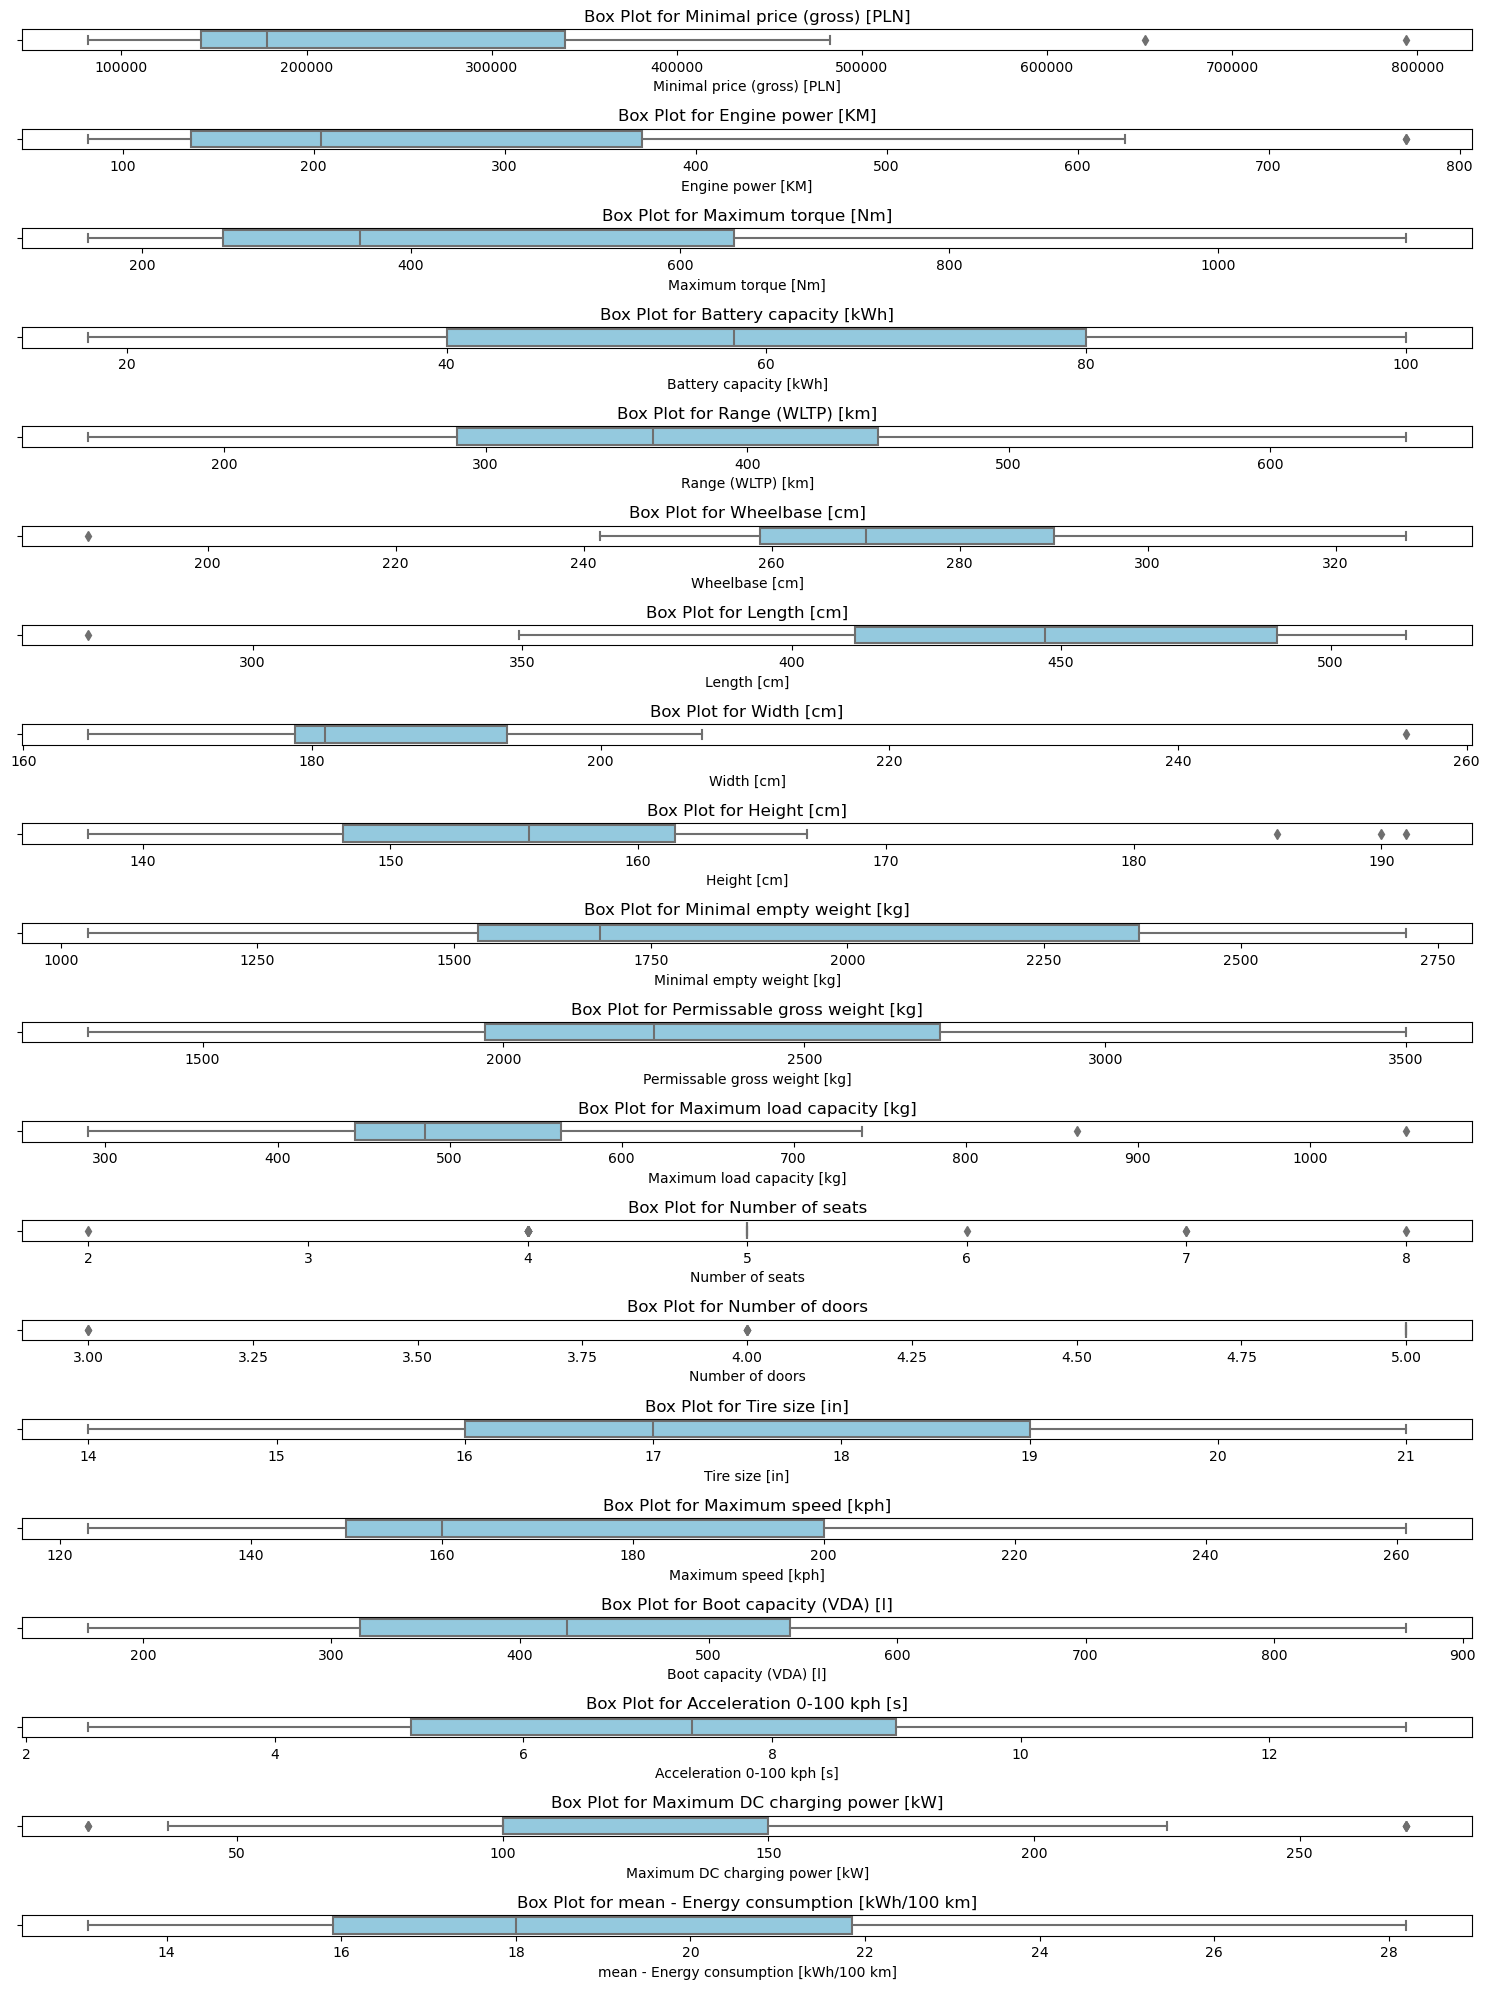

In [26]:
continuous_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Plot box plots for each continuous variable
plt.figure(figsize=(15, 20))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(len(continuous_columns), 1, i)
    sns.boxplot(data= data, x=column, color='skyblue')
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.tight_layout()

#### There are: 
##### 2 outliers for Price.
##### 1 outlier for Engine Power.
##### 1 outlier for Width.
##### 3 outliers for Height.
##### 2 outliers for Load Capacity.
##### 1 outlier for DC charging power.
##### Wheelbase,Height, & DC charging power 1 outlier each on the lower end. 

# Task 4: Correlation 

,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Battery capacity [kWh],Range (WLTP) [km],Wheelbase [cm],Length [cm],Width [cm],Height [cm],Minimal empty weight [kg],Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
Minimal price (gross) [PLN],1.000000,0.887146,0.878673,0.816513,0.506311,0.645141,0.742424,0.538703,-0.143217,0.810863,0.702922,0.408814,0.084391,-0.251997,0.762241,0.839414,0.569046,-0.788205,0.855938,0.685051
Engine power [KM],0.887146,1.000000,0.963558,0.852380,0.704177,0.622910,0.732844,0.547958,-0.222466,0.782882,0.558353,0.219997,0.170583,-0.127781,0.816400,0.936912,0.657612,-0.886769,0.756852,0.518251
Maximum torque [Nm],0.878673,0.963558,1.000000,0.833661,0.608532,0.617950,0.731517,0.532670,-0.146665,0.809609,0.597192,0.223430,0.192065,-0.059644,0.788039,0.869748,0.670302,-0.838427,0.718691,0.568060
Battery capacity [kWh],0.816513,0.852380,0.833661,1.000000,0.810439,0.768190,0.847859,0.596496,0.023974,0.922944,0.775988,0.414868,0.322401,0.081257,0.794093,0.808666,0.721615,-0.818494,0.761795,0.623438
Range (WLTP) [km],0.506311,0.704177,0.608532,0.810439,1.000000,0.543831,0.622771,0.449905,-0.204751,0.585427,0.377780,0.100778,0.260799,0.180208,0.680959,0.749304,0.512180,-0.719866,0.566520,0.140780
Wheelbase [cm],0.645141,0.622910,0.617950,0.768190,0.543831,1.000000,0.923959,0.542909,0.300418,0.835694,0.828054,0.744437,0.643433,0.287811,0.625286,0.600772,0.728138,-0.583901,0.617206,0.683567
Length [cm],0.742424,0.732844,0.731517,0.847859,0.622771,0.923959,1.000000,0.593569,0.134934,0.885366,0.836820,0.612319,0.503590,0.213272,0.713818,0.728818,0.778569,-0.753557,0.736709,0.677684
Width [cm],0.538703,0.547958,0.532670,0.596496,0.449905,0.542909,0.593569,1.000000,0.030915,0.575602,0.495926,0.329434,0.347542,0.075470,0.562873,0.556110,0.506408,-0.531822,0.530594,0.380051
Height [cm],-0.143217,-0.222466,-0.146665,0.023974,-0.204751,0.300418,0.134934,0.030915,1.000000,0.221711,0.295200,0.520849,0.525857,0.352966,-0.088007,-0.366791,0.352072,0.268082,-0.305874,0.321489
Minimal empty weight [kg],0.810863,0.782882,0.809609,0.922944,0.585427,0.835694,0.885366,0.575602,0.221711,1.000000,0.908366,0.565555,0.380914,0.091225,0.773997,0.700600,0.759029,-0.728117,0.712539,0.763811


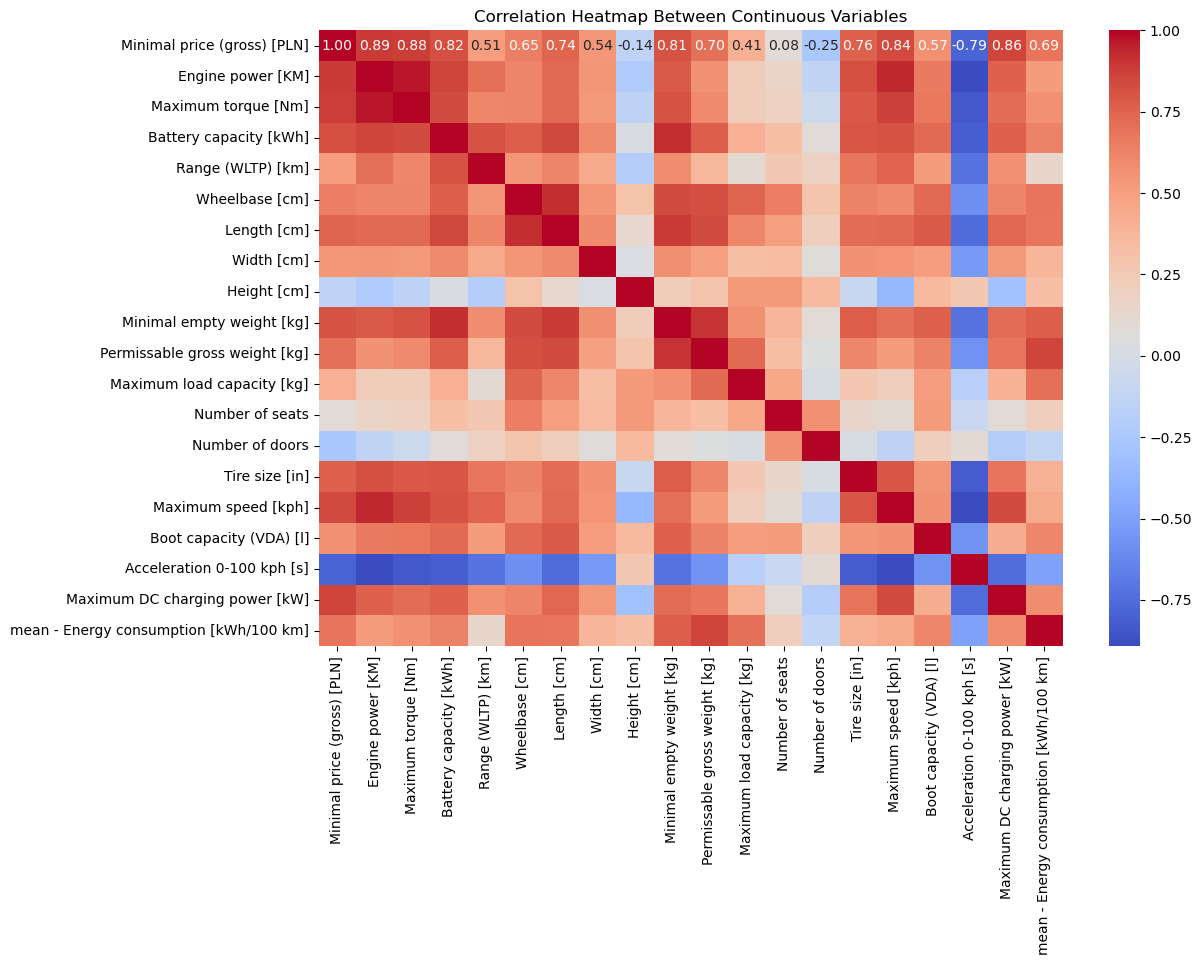

In [27]:
continuous_columns = data.select_dtypes(include=['float64', 'int64'])

# correlation matrix
correlation_matrix = continuous_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap Between Continuous Variables')

#Corr Values
correlation_matrix

### We can find very high Correlation between 
##### 1. Price & Engine Power (Positive)
##### 2. Price & Torque (Positive)
##### 3. Power & Torque (Positive)
##### 4. Price & Empty Weight (Positive)
##### 5. Price & Max Speed (Positive)
##### 6. Price & Accelaration (Negative)
##### 7. Price & DC charging power (Positive)
### Similarly we can explore other correlations

# Task 5: Trend in data

C:\Users\ahire\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ahire\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ahire\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ahire\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

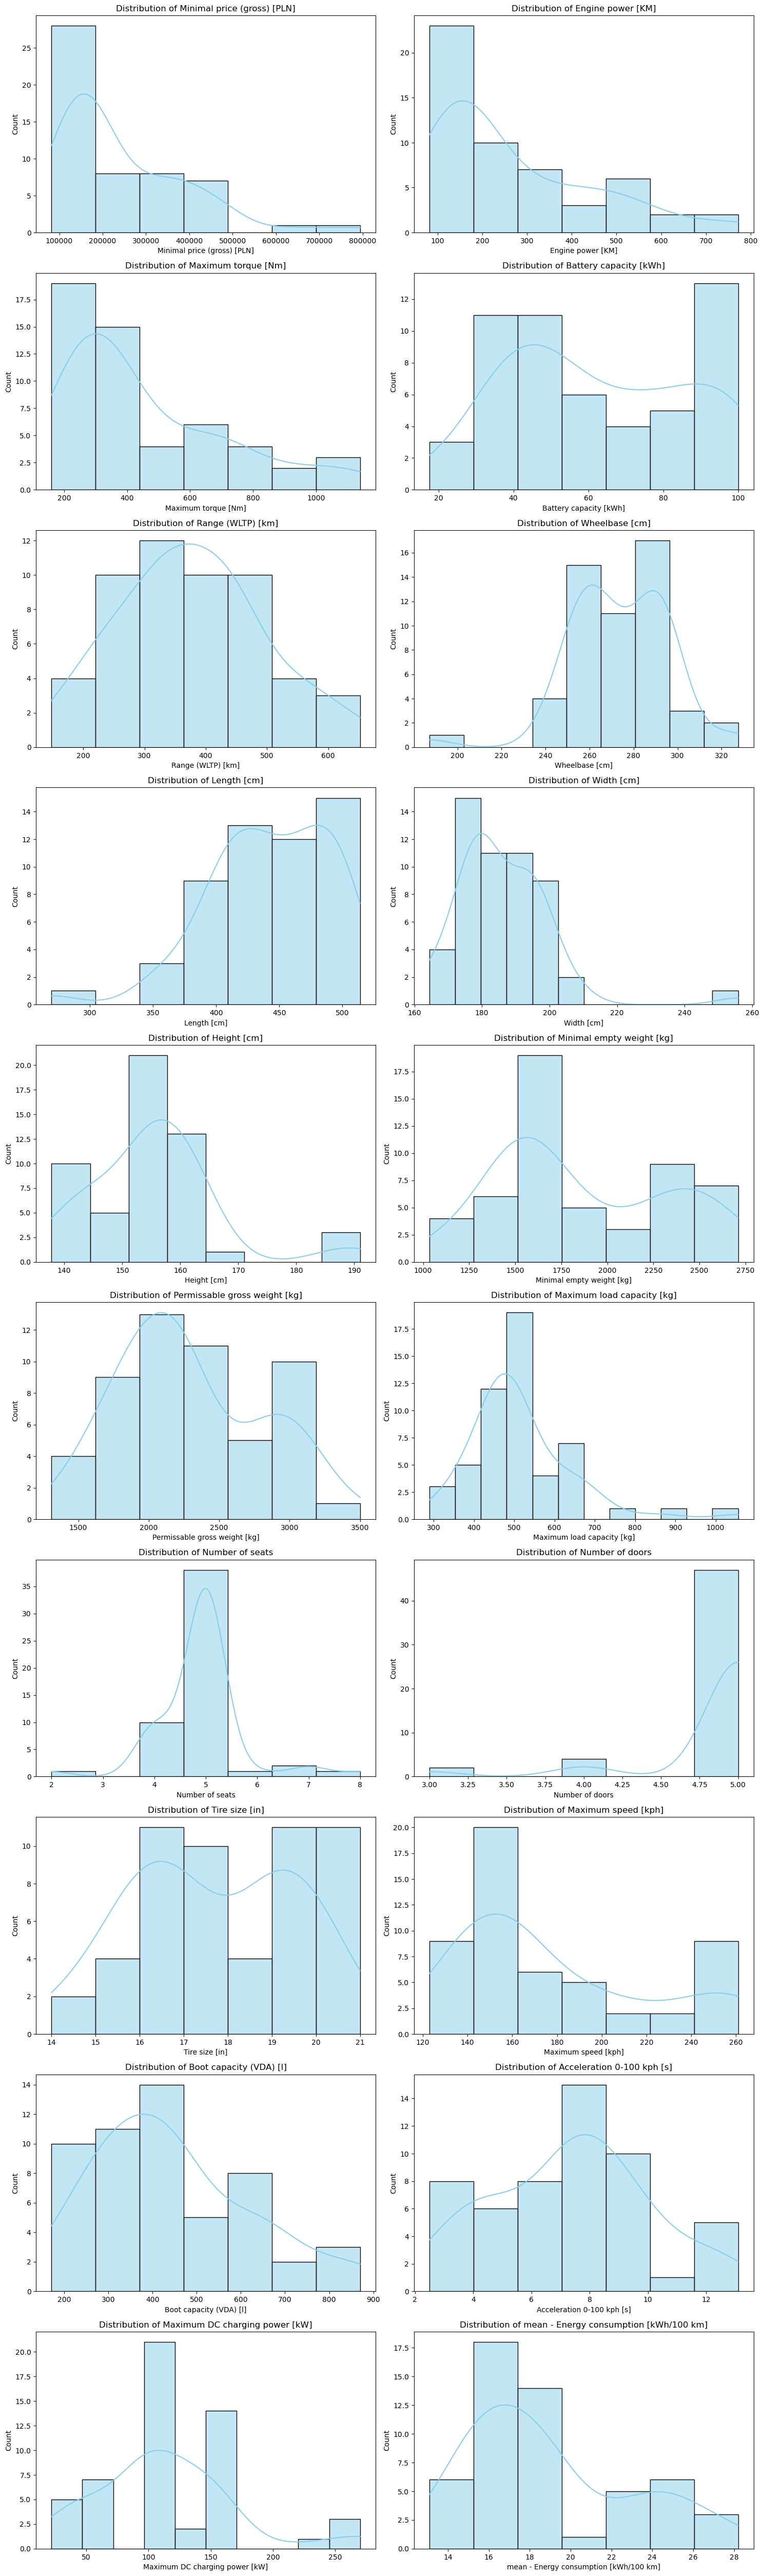

In [28]:
categorical_columns = data.select_dtypes(include=['object']).columns
continuous_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Plotting Distribution for Continuous Variables
plt.figure(figsize=(15, 100))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(len(continuous_columns), 2, i)
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
plt.tight_layout()

### Trend in few important features in the EVs.
##### 1. Price (PLN): Right-skewed, indicating a higher concentration of lower-priced EVs with some expensive outliers.
##### 2. Engine Power [KM]: Bimodal distribution, showing two common ranges of power likely catering to different vehicle segments.
##### 3. Battery Capacity [kWh]: Left-skewed, with most vehicles clustering around mid to high battery capacities.
##### 4. Range (WLTP) [km]: Slightly right-skewed, reflecting more EVs with shorter to moderate ranges.
##### 5. Acceleration 0-100 kph [s]: Left-skewed, as most EVs are designed for quick acceleration within a few seconds.
##### 6. DC charging power [kW]: Uniformly distributed, indicating a balanced range of fast-charging capabilities across models.
##### 7. mean - Energy consumption [kWh/100 km]: Normal distribution, showing average energy efficiency for most vehicles.
##### 8. Torque [Nm]: Right-skewed, suggesting most EVs have moderate torque, with fewer high-performance models.
##### 9. Boot capacity (VDA) [l]: Normal distribution, indicating standard luggage capacities.
##### 10. Permissible gross weight [kg]: Narrow range with a slight right skew, reflecting vehicle weight regulations.
##### 11. Maximum load capacity [kg]: Right-skewed, suggesting most EVs have moderate load capabilities.

### For relation between the variables we can find the correlation coefficient in task 4.

# Task 6: Manufacturer Analysis

##### There is no relevant data for analysis of performance of manufaturers.

In [29]:
data.head() 

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [30]:
data['Make'].value_counts().count()

20

In [31]:
data['Make'].value_counts()

Make
Tesla            7
Audi             6
Kia              4
Porsche          4
Volkswagen       4
Hyundai          3
BMW              3
Nissan           3
Honda            2
Mercedes-Benz    2
Opel             2
Peugeot          2
Renault          2
Smart            2
Citroën          2
Jaguar           1
Mazda            1
DS               1
Skoda            1
Mini             1
Name: count, dtype: int64

##### From above summary it can be found out that there are 20 manufacturers. In total there are 53 models. 
##### Most models are with Tesla 7 then Audi 6. 
##### There are 5 makers with 1 model each. 

# Task 7: Top EVs by Range, Accelaration, Max Speed. 

In [32]:
data.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [33]:
#Top 5 EVs by Range
data.sort_values(by='Range (WLTP) [km]', ascending=False).head(5)

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
42,Tesla Model S Long Range Plus,Tesla,Model S Long Range Plus,368990,525,755,disc (front + rear),4WD,100.0,652,...,2288.844444,486.0,5,5,19,250,745.0,3.8,150,18.994318
43,Tesla Model S Performance,Tesla,Model S Performance,443990,772,1140,disc (front + rear),4WD,100.0,639,...,2288.844444,486.0,5,5,21,261,745.0,2.5,150,18.994318
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,372,510,disc (front + rear),4WD,75.0,580,...,2288.844444,486.0,5,5,18,233,425.0,4.4,150,18.994318
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,480,639,disc (front + rear),4WD,75.0,567,...,2288.844444,486.0,5,5,20,261,425.0,3.3,150,18.994318
44,Tesla Model X Long Range Plus,Tesla,Model X Long Range Plus,407990,525,755,disc (front + rear),4WD,100.0,561,...,2288.844444,486.0,7,5,20,250,857.0,4.6,150,18.994318


#### Top 5 Ranges are between 652 & 561.  

In [34]:
# Top 5 models by Accelaration (lowest first)
data.sort_values(by='Acceleration 0-100 kph [s]', ascending=True).head(5)

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
43,Tesla Model S Performance,Tesla,Model S Performance,443990,772,1140,disc (front + rear),4WD,100.0,639,...,2288.844444,486.0,5,5,21,261,745.0,2.5,150,18.994318
33,Porsche Taycan Turbo S,Porsche,Taycan Turbo S,794000,625,1050,disc (front + rear),4WD,93.4,412,...,2870.000000,575.0,4,4,21,260,447.0,2.8,270,25.100000
45,Tesla Model X Performance,Tesla,Model X Performance,482990,772,1140,disc (front + rear),4WD,100.0,548,...,2288.844444,486.0,7,5,20,261,857.0,2.8,150,18.994318
32,Porsche Taycan Turbo,Porsche,Taycan Turbo,653000,625,850,disc (front + rear),4WD,93.4,450,...,2880.000000,575.0,4,4,20,260,447.0,3.2,270,24.850000
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,480,639,disc (front + rear),4WD,75.0,567,...,2288.844444,486.0,5,5,20,261,425.0,3.3,150,18.994318


#### Top 5 Models by Accelaration i.e. low seconds first lie between 2.5 seconds to 3.3 seconds. 

In [35]:
# Top 5 models by Max Speed
data.sort_values(by='Maximum speed [kph]', ascending=False).head(5)

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,480,639,disc (front + rear),4WD,75.0,567,...,2288.844444,486.0,5,5,20,261,425.0,3.3,150,18.994318
43,Tesla Model S Performance,Tesla,Model S Performance,443990,772,1140,disc (front + rear),4WD,100.0,639,...,2288.844444,486.0,5,5,21,261,745.0,2.5,150,18.994318
45,Tesla Model X Performance,Tesla,Model X Performance,482990,772,1140,disc (front + rear),4WD,100.0,548,...,2288.844444,486.0,7,5,20,261,857.0,2.8,150,18.994318
33,Porsche Taycan Turbo S,Porsche,Taycan Turbo S,794000,625,1050,disc (front + rear),4WD,93.4,412,...,2870.000000,575.0,4,4,21,260,447.0,2.8,270,25.100000
32,Porsche Taycan Turbo,Porsche,Taycan Turbo,653000,625,850,disc (front + rear),4WD,93.4,450,...,2880.000000,575.0,4,4,20,260,447.0,3.2,270,24.850000


#### Top 5 Max speeds are 261 & 260. (3 Are by Tesla & 2 by Porsche)

# Task 8: Hypothesis - Similarity in 'Engine Power' between Tesla & Audi

In [38]:
data.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [39]:
# 2 Sample t test. 
from scipy.stats import ttest_ind

tesla_data = data[data['Make'] == 'Tesla']['Engine power [KM]']
audi_data = data[data['Make'] == 'Audi']['Engine power [KM]']

# Perform the 2-sample t-test
t_stat, p_value = ttest_ind(tesla_data, audi_data, equal_var=False)

print("2-Sample T-Test Results:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average engine power of Tesla and Audi is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in the average engine power of Tesla and Audi.")

2-Sample T-Test Results:
T-Statistic: 1.7939951827297178
P-Value: 0.10684105068839565
Fail to reject the null hypothesis: No significant difference in the average engine power of Tesla and Audi.


# Task 9: Future Prediction of EVs

# Task 10: Recommendations & Conclusion